In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
def get_ref():
    """returns a DataFrame containing all the reference structure values"""
    ref_df = pd.read_csv("../RAW_DATA/reference-cablam.csv", index_col = 0)
    return ref_df



def make_water_df_list(run):
    
    df_3J95 = pd.read_csv(("../RAW_DATA/{}/3J95_cablam.csv").format(run), index_col = "structure")
    df_3J96 = pd.read_csv(("../RAW_DATA/{}/3J96_cablam.csv").format(run), index_col = "structure")
    df_5GRS = pd.read_csv(("../RAW_DATA/{}/5GRS_cablam.csv").format(run), index_col = "structure")
    df_5HNY = pd.read_csv(("../RAW_DATA/{}/5HNY_cablam.csv").format(run), index_col = "structure")
    df_5WCB = pd.read_csv(("../RAW_DATA/{}/5WCB_cablam.csv").format(run), index_col = "structure")
    df_6ACG = pd.read_csv(("../RAW_DATA/{}/6ACG_cablam.csv").format(run), index_col = "structure") 
    df_6AHF = pd.read_csv(("../RAW_DATA/{}/6AHF_cablam.csv").format(run), index_col = "structure")
    df_6IRF = pd.read_csv(("../RAW_DATA/{}/6IRF_cablam.csv").format(run), index_col = "structure")
    df_6N1Q = pd.read_csv(("../RAW_DATA/{}/6N1Q_cablam.csv").format(run), index_col = "structure")
    df_6N7G = pd.read_csv(("../RAW_DATA/{}/6N7G_cablam.csv").format(run), index_col = "structure")
    df_6N8Z = pd.read_csv(("../RAW_DATA/{}/6N8Z_cablam.csv").format(run), index_col = "structure")
    df_6R7I = pd.read_csv(("../RAW_DATA/{}/6R7I_cablam.csv").format(run), index_col = "structure")
    df_6UBY = pd.read_csv(("../RAW_DATA/{}/6UBY_cablam.csv").format(run), index_col = "structure")
    df_6UC0 = pd.read_csv(("../RAW_DATA/{}/6UC0_cablam.csv").format(run), index_col = "structure")
    
    df_list = [
        df_3J95,
        df_3J96,
        df_5GRS,
        df_5HNY,
        df_5WCB,
        df_6ACG,
        df_6AHF,
        df_6IRF,
        df_6N1Q,
        df_6N7G,
        df_6N8Z,
        df_6R7I,
        df_6UBY,
        df_6UC0,
    ]
    
    return df_list

In [3]:
runs =[
    "SA", "SA_CA", 
    "SA_SR", "SA_CM", "SA_CTRD", "MD",   
    "CG", "CG_MD"
]   


In [4]:
pepout_df = pd.DataFrame()
ref_df = get_ref()
for run in runs:
    df_list = make_water_df_list(run)
    data_frame = pd.DataFrame()
    for df in iter(df_list):
        df = df["peptide-outlier-percent"]
        structure = df.index[0][:4]
        df = df.sub(ref_df.loc[structure,"peptide-outlier-percent"])
        data_frame = pd.concat([data_frame, df], ignore_index=True, axis = 0)
    pepout_df = pd.concat([pepout_df, data_frame], axis=1, ignore_index=True)

In [5]:
pepbadout_df = pd.DataFrame()
ref_df = get_ref()
for run in runs:
    df_list = make_water_df_list(run)
    data_frame = pd.DataFrame()
    for df in iter(df_list):
        df = df["peptide-bad-outlier-percent"]
        structure = df.index[0][:4]
        df = df.sub(ref_df.loc[structure,"peptide-bad-outlier-percent"])
        data_frame = pd.concat([data_frame, df], ignore_index=True, axis = 0)
    pepbadout_df = pd.concat([pepbadout_df, data_frame], axis=1, ignore_index=True)

In [6]:
caout_df = pd.DataFrame()
ref_df = get_ref()
for run in runs:
    df_list = make_water_df_list(run)
    data_frame = pd.DataFrame()
    for df in iter(df_list):
        df = df["ca-outlier-percent"]
        structure = df.index[0][:4]
        df = df.sub(ref_df.loc[structure,"ca-outlier-percent"])
        data_frame = pd.concat([data_frame, df], ignore_index=True, axis = 0)
    caout_df = pd.concat([caout_df, data_frame], axis=1, ignore_index=True)

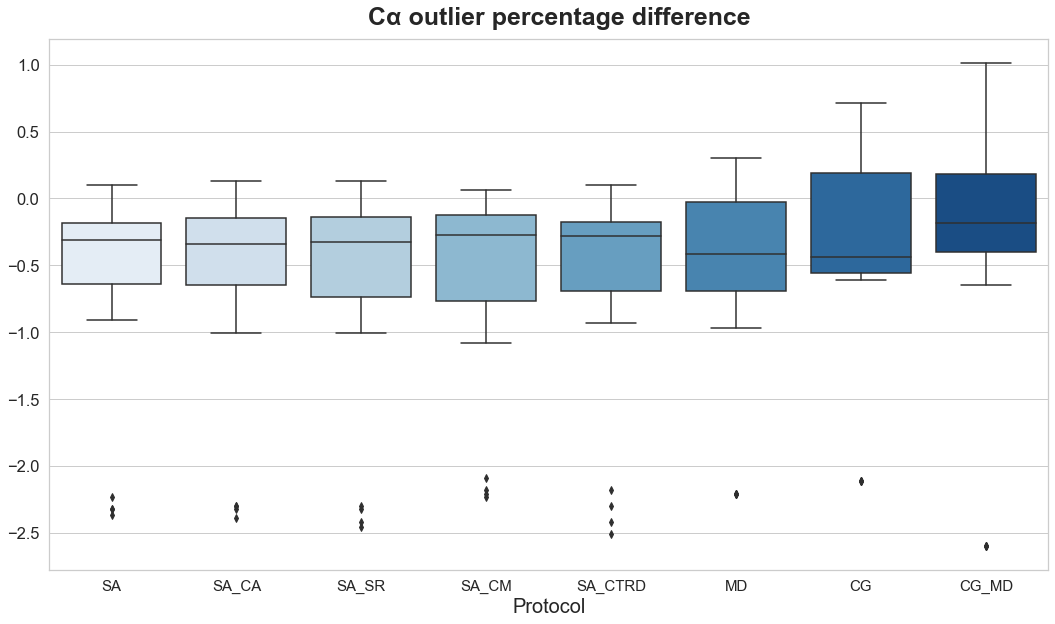

In [12]:
fig, ax = plt.subplots(nrows=1, figsize=(15,9))
sns.set(font_scale=1.5, style="whitegrid")


# fill the plots
# pepout_plot = sns.boxplot(data=pepout_df, ax=ax[0], palette="Blues")
# pepbadout_plot = sns.boxplot(data = pepbadout_df, ax=ax[1], palette="Blues")
caout_plot = sns.boxplot(data=caout_df, palette="Blues")


# cor_plot.set_title("Top 4 analysis of {} cryo-EM models".format(len(succes_list)), fontsize = 30)

# pepout_plot.set_xticks([])
# pepbadout_plot.set_xticks([])
caout_plot.set_xticklabels(runs, fontsize=15)



# caout_plot.set_ylabel("Δ Cα outlier percentage", fontsize=20)
# pepout_plot.set_ylabel("Δ Peptide outlier percentage", fontsize=20)
# pepbadout_plot.set_ylabel("Δ Bad peptide outlier percentage", fontsize=20)
caout_plot.set_xlabel("Protocol", fontsize=20)

# pepout_plot.text(1.8,13.5,"Mild peptide outlier percentage difference", fontsize=25, weight="semibold")
# pepout_plot.text(-1.13,13.5,"A", fontsize=25, weight="semibold")


# pepbadout_plot.text(1.65,8,"Severe peptide outlier percentage difference", fontsize=25, weight="semibold")
# pepbadout_plot.text(-1.13,8,"B", fontsize=25, weight="semibold")

caout_plot.text(2.05,1.3,"Cα outlier percentage difference", fontsize=25, weight="semibold")
# caout_plot.text(-1.13,1.3,"C", fontsize=25, weight="semibold")

# fig.align_ylabels(ax[:])
plt.tight_layout()
plt.savefig("supplemental_figure_3.pdf", dpi=300, bbox_inches='tight')

In [26]:
pepout_df.describe()

,0,1,2,3,4,5,6,7
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,-0.869643,-0.864286,-0.808929,-0.837500,-0.841071,-0.519643,2.319643,2.241071
std,1.972900,2.175853,1.955717,2.063586,2.035751,2.399123,3.777513,3.539788
min,-5.000000,-5.400000,-5.500000,-5.300000,-5.100000,-5.600000,-3.600000,-3.200000
25%,-1.900000,-2.100000,-1.925000,-2.250000,-2.200000,-2.000000,0.100000,-0.700000
50%,-0.700000,-0.200000,-0.400000,-0.500000,-0.500000,-0.550000,2.300000,2.850000
75%,1.000000,1.200000,0.825000,1.200000,1.100000,2.000000,4.600000,4.000000
max,2.400000,1.900000,2.100000,2.200000,2.100000,3.200000,12.300000,8.400000


In [27]:
pepbadout_df.describe()

,0,1,2,3,4,5,6,7
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,-0.251786,-0.307143,-0.260714,-0.207143,-0.291071,-0.226786,1.580357,1.517857
std,1.037478,1.052418,1.024727,1.061364,1.028375,1.142802,2.158907,1.917110
min,-2.600000,-2.900000,-2.800000,-2.600000,-2.700000,-3.400000,-1.600000,-1.400000
25%,-1.000000,-0.950000,-1.000000,-0.925000,-0.925000,-0.900000,0.200000,-0.225000
50%,-0.100000,0.000000,-0.050000,0.000000,-0.100000,-0.500000,1.150000,1.200000
75%,0.425000,0.300000,0.500000,0.800000,0.425000,0.850000,2.700000,3.200000
max,1.200000,1.200000,1.600000,1.400000,1.300000,1.600000,7.200000,5.100000


In [28]:
caout_df.describe()

,0,1,2,3,4,5,6,7
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,-0.503929,-0.486607,-0.502857,-0.480000,-0.503929,-0.455000,-0.301429,-0.230179
std,0.576212,0.594430,0.597327,0.562436,0.587025,0.580157,0.668179,0.768882
min,-2.370000,-2.390000,-2.460000,-2.230000,-2.510000,-2.210000,-2.110000,-2.600000
25%,-0.640000,-0.645000,-0.740000,-0.770000,-0.692500,-0.690000,-0.560000,-0.400000
50%,-0.310000,-0.340000,-0.325000,-0.275000,-0.280000,-0.415000,-0.440000,-0.185000
75%,-0.185000,-0.147500,-0.140000,-0.122500,-0.177500,-0.030000,0.190000,0.180000
max,0.100000,0.130000,0.130000,0.060000,0.100000,0.300000,0.710000,1.010000
